<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


## **TASK 1**


In [5]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [6]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB


CRIM: Per capita crime rate by town.

ZN: Proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS: Proportion of non-retail business acres per town.

CHAS: Charles River dummy variable

NOX: Nitric oxides concentration

RM: Average number of rooms per dwelling

AGE: Proportion of owner-occupied units built prior to 1940

DIS: Weighted distances to five Boston employment centers

RAD: Index of accessibility to radial highways

TAX: Full-value property-tax rate per $10,000

PTRATIO: Pupil-teacher ratio by town

LSTAT: Percentage of the lower status of the population

MEDV: Median value of owner-occupied homes in $1000s

## **TASK 2**

**Median Value of Houses vs. Charles River**

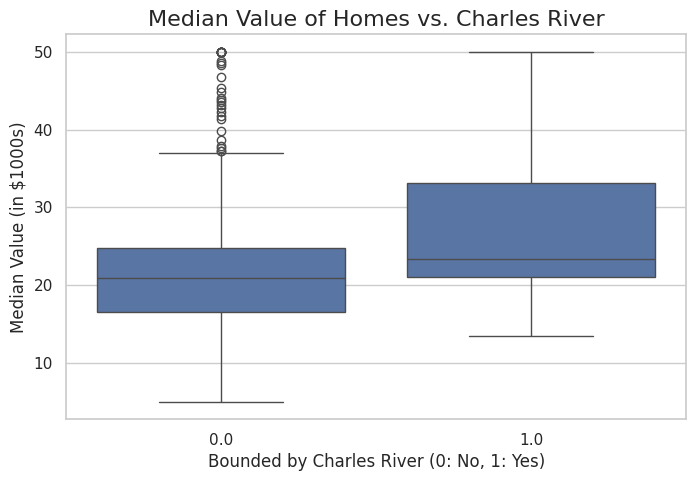

In [8]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create the boxplot
pyplot.figure(figsize=(8, 5))
ax = sns.boxplot(x='CHAS', y='MEDV', data=boston_df)
ax.set_title('Median Value of Homes vs. Charles River', fontsize=16)
ax.set_xlabel('Bounded by Charles River (0: No, 1: Yes)', fontsize=12)
ax.set_ylabel('Median Value (in $1000s)', fontsize=12)
pyplot.show()

the median value for houses by the river is higher than for those not by the river

**Median Value vs. Proportion of Old Units**

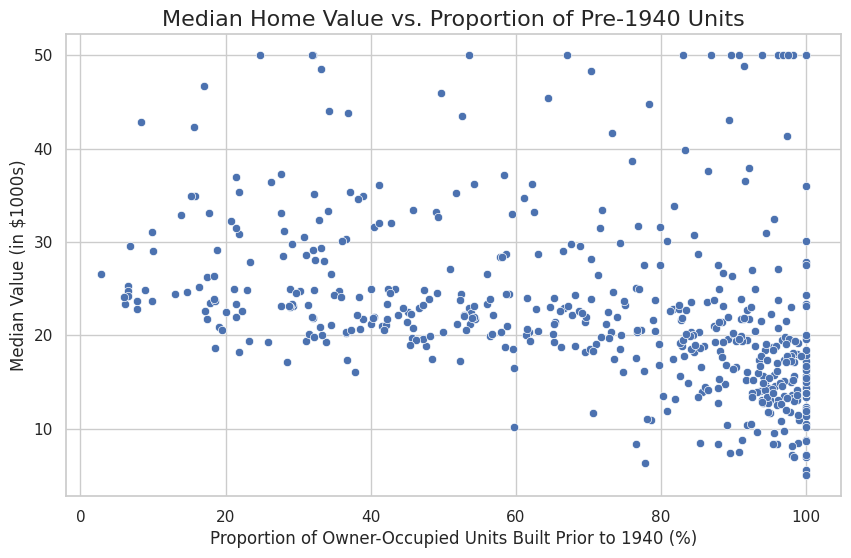

In [9]:
pyplot.figure(figsize=(10, 6))
ax = sns.scatterplot(x='AGE', y='MEDV', data=boston_df)
ax.set_title('Median Home Value vs. Proportion of Pre-1940 Units', fontsize=16)
ax.set_xlabel('Proportion of Owner-Occupied Units Built Prior to 1940 (%)', fontsize=12)
ax.set_ylabel('Median Value (in $1000s)', fontsize=12)
pyplot.show()

**Nitric Oxide vs. Non-Retail Business Acres**

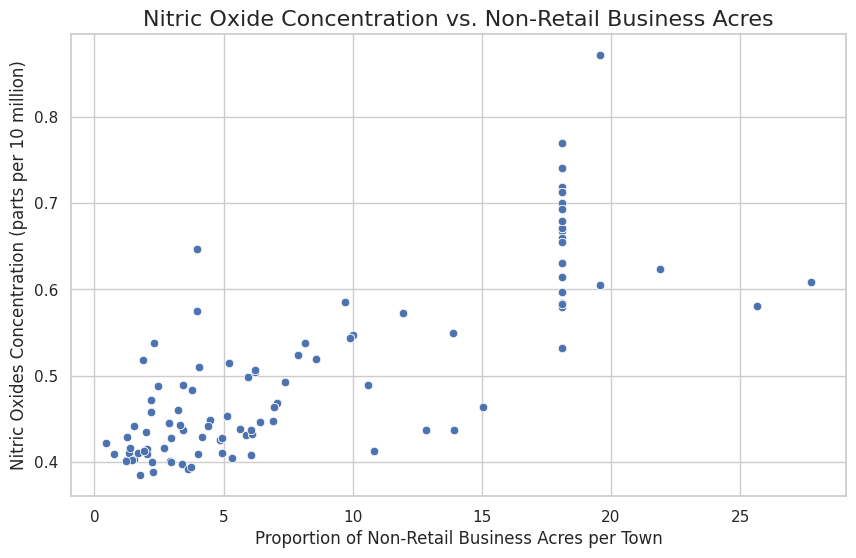

In [10]:
pyplot.figure(figsize=(10, 6))
ax = sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
ax.set_title('Nitric Oxide Concentration vs. Non-Retail Business Acres', fontsize=16)
ax.set_xlabel('Proportion of Non-Retail Business Acres per Town', fontsize=12)
ax.set_ylabel('Nitric Oxides Concentration (parts per 10 million)', fontsize=12)
pyplot.show()

**Median Value vs. Distance to Employment Centers**

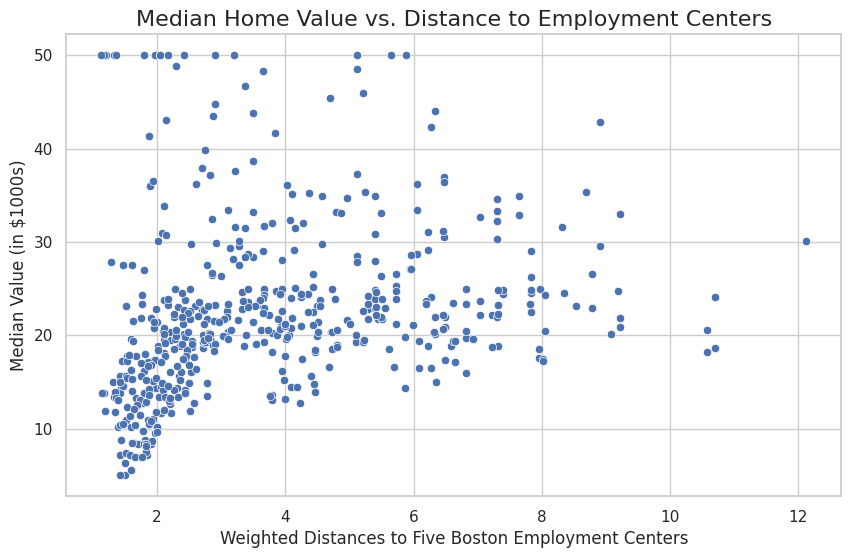

In [11]:
pyplot.figure(figsize=(10, 6))
ax = sns.scatterplot(x='DIS', y='MEDV', data=boston_df)
ax.set_title('Median Home Value vs. Distance to Employment Centers', fontsize=16)
ax.set_xlabel('Weighted Distances to Five Boston Employment Centers', fontsize=12)
ax.set_ylabel('Median Value (in $1000s)', fontsize=12)
pyplot.show()

## **TASK 3**

**Difference in Median Value by Charles River Proximity**

In [12]:
# Separate the data into two groups
group1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
group2 = boston_df[boston_df['CHAS'] == 0]['MEDV']

# Perform the independent t-test
t_statistic, p_value = scipy.stats.ttest_ind(group1, group2)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Conclusion: We reject the null hypothesis. There is a significant difference in median values.")
else:
    print("Conclusion: We fail to reject the null hypothesis. There is no significant difference in median values.")

T-statistic: 3.996437466090509
P-value: 7.390623170519905e-05
Conclusion: We reject the null hypothesis. There is a significant difference in median values.


**Difference in Median Values by Age of House**

In [13]:
# Create age categories
boston_df.loc[boston_df['AGE'] <= 35, 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[boston_df['AGE'] >= 70, 'age_group'] = '70 years and older'

# Perform the ANOVA test
f_statistic, p_value = scipy.stats.f_oneway(
    boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'],
    boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'],
    boston_df[boston_df['age_group'] == '70 years and older']['MEDV']
)

print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Conclusion: We reject the null hypothesis. There is a significant difference in median values across age groups.")
else:
    print("Conclusion: We fail to reject the null hypothesis. There is no significant difference in median values across age groups.")

F-statistic: 36.40764999196599
P-value: 1.7105011022702984e-15
Conclusion: We reject the null hypothesis. There is a significant difference in median values across age groups.


**Relationship between Nitric Oxide and Non-Retail Acres**

In [14]:
correlation, p_value = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

print(f"Pearson Correlation Coefficient: {correlation}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Conclusion: We reject the null hypothesis. There is a significant relationship between NOX and INDUS.")
else:
    print("Conclusion: We fail to reject the null hypothesis. There is no significant relationship between NOX and INDUS.")

Pearson Correlation Coefficient: 0.7636514469209192
P-value: 7.913361061210442e-98
Conclusion: We reject the null hypothesis. There is a significant relationship between NOX and INDUS.


**Impact of Distance to Employment Centers on Home Value**

In [15]:
# Define the independent variable (X) and the dependent variable (y)
X = boston_df['DIS']
y = boston_df['MEDV']

# Add a constant to the independent variable (required by statsmodels)
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 31 Aug 2025   Prob (F-statistic):           1.21e-08
Time:                        11:03:54   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

## **TASK 4**

Proximity to Charles River Significantly Impacts Value

difference in home values based on proximity to the Charles River

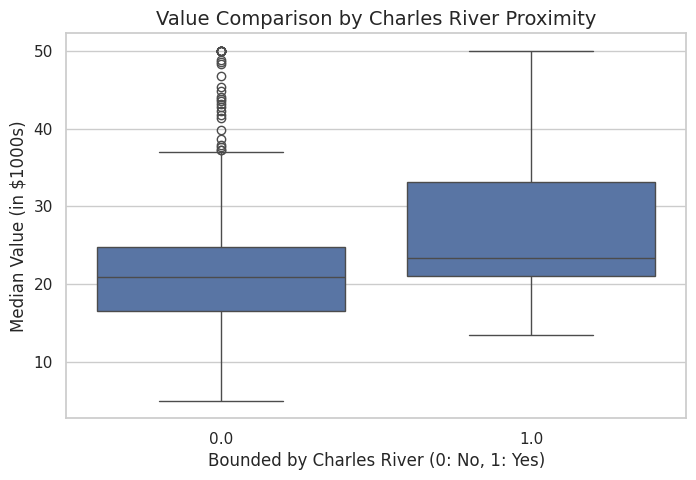

In [17]:
pyplot.figure(figsize=(8, 5))
ax = sns.boxplot(x='CHAS', y='MEDV', data=boston_df)
ax.set_title('Value Comparison by Charles River Proximity', fontsize=14)
ax.set_xlabel('Bounded by Charles River (0: No, 1: Yes)', fontsize=12)
ax.set_ylabel('Median Value (in $1000s)', fontsize=12)
pyplot.show()

Age of Housing Stock is a Key Factor

difference in median home values across different age groups

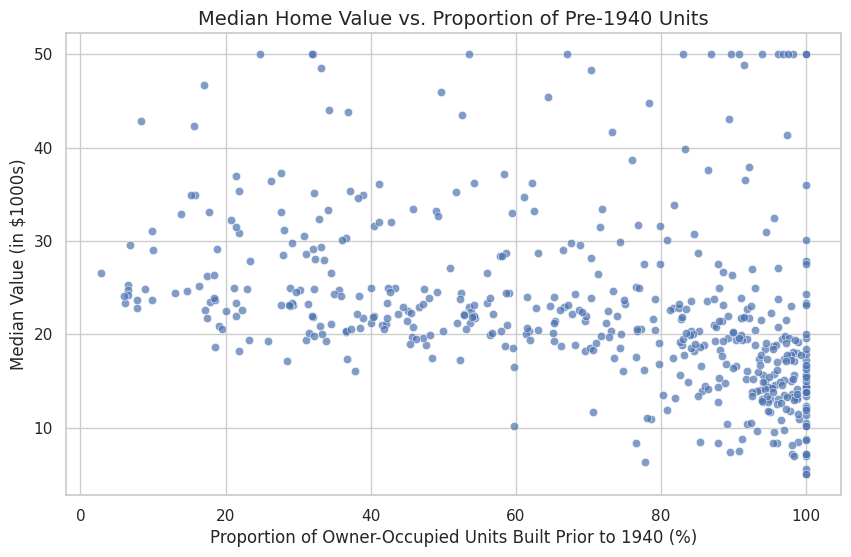

In [18]:
pyplot.figure(figsize=(10, 6))
ax = sns.scatterplot(x='AGE', y='MEDV', data=boston_df, alpha=0.7)
ax.set_title('Median Home Value vs. Proportion of Pre-1940 Units', fontsize=14)
ax.set_xlabel('Proportion of Owner-Occupied Units Built Prior to 1940 (%)', fontsize=12)
ax.set_ylabel('Median Value (in $1000s)', fontsize=12)
pyplot.show()

Industrial Activity Strongly Correlates with Air Pollution

positive correlation between the proportion of non-retail business acres (INDUS) and nitric oxide concentrations (NOX)

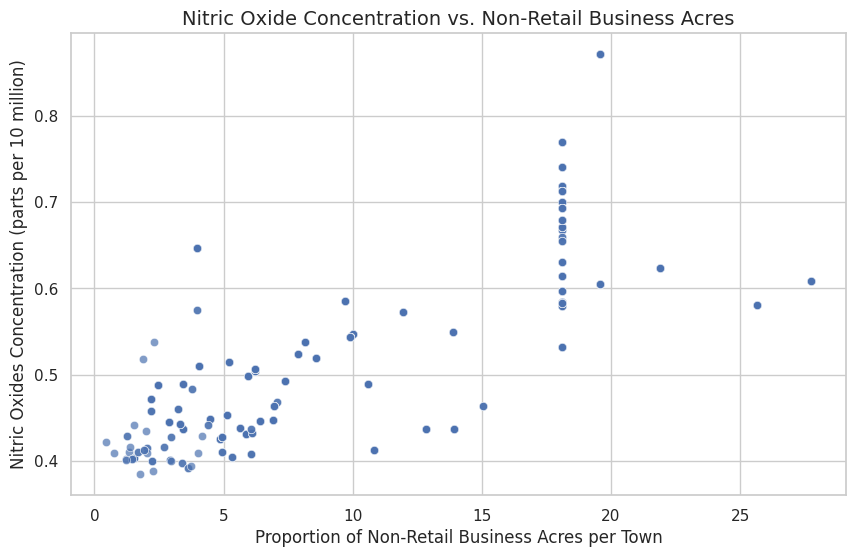

In [19]:
pyplot.figure(figsize=(10, 6))
ax = sns.scatterplot(x='INDUS', y='NOX', data=boston_df, alpha=0.7)
ax.set_title('Nitric Oxide Concentration vs. Non-Retail Business Acres', fontsize=14)
ax.set_xlabel('Proportion of Non-Retail Business Acres per Town', fontsize=12)
ax.set_ylabel('Nitric Oxides Concentration (parts per 10 million)', fontsize=12)
pyplot.show()

Distance from Employment Centers Influences Home Value

distance to Boston's five main employment centers (DIS) has a positive impact on median home values

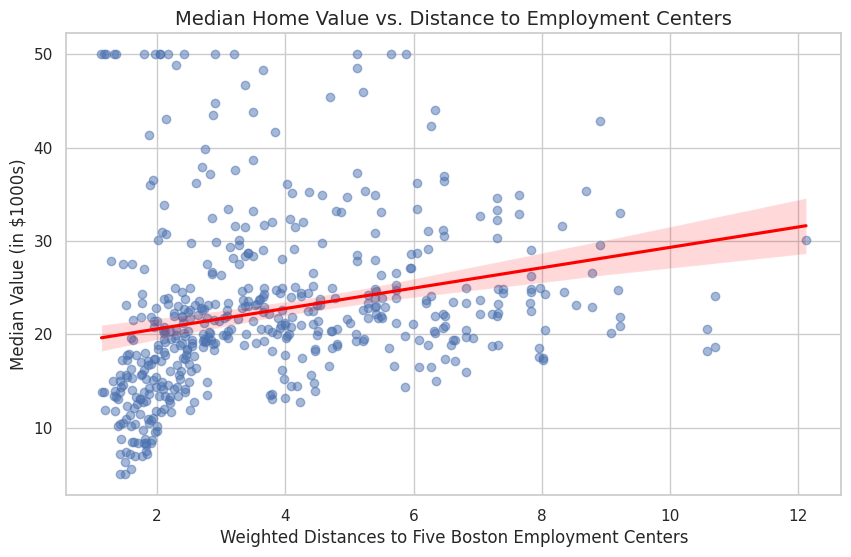

In [20]:
pyplot.figure(figsize=(10, 6))
ax = sns.regplot(x='DIS', y='MEDV', data=boston_df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
ax.set_title('Median Home Value vs. Distance to Employment Centers', fontsize=14)
ax.set_xlabel('Weighted Distances to Five Boston Employment Centers', fontsize=12)
ax.set_ylabel('Median Value (in $1000s)', fontsize=12)
pyplot.show()

<ipython-input-24-da1740225b56>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='CHAS', y='MEDV', data=boston_df, ax=ax1, palette='coolwarm', width=0.5)


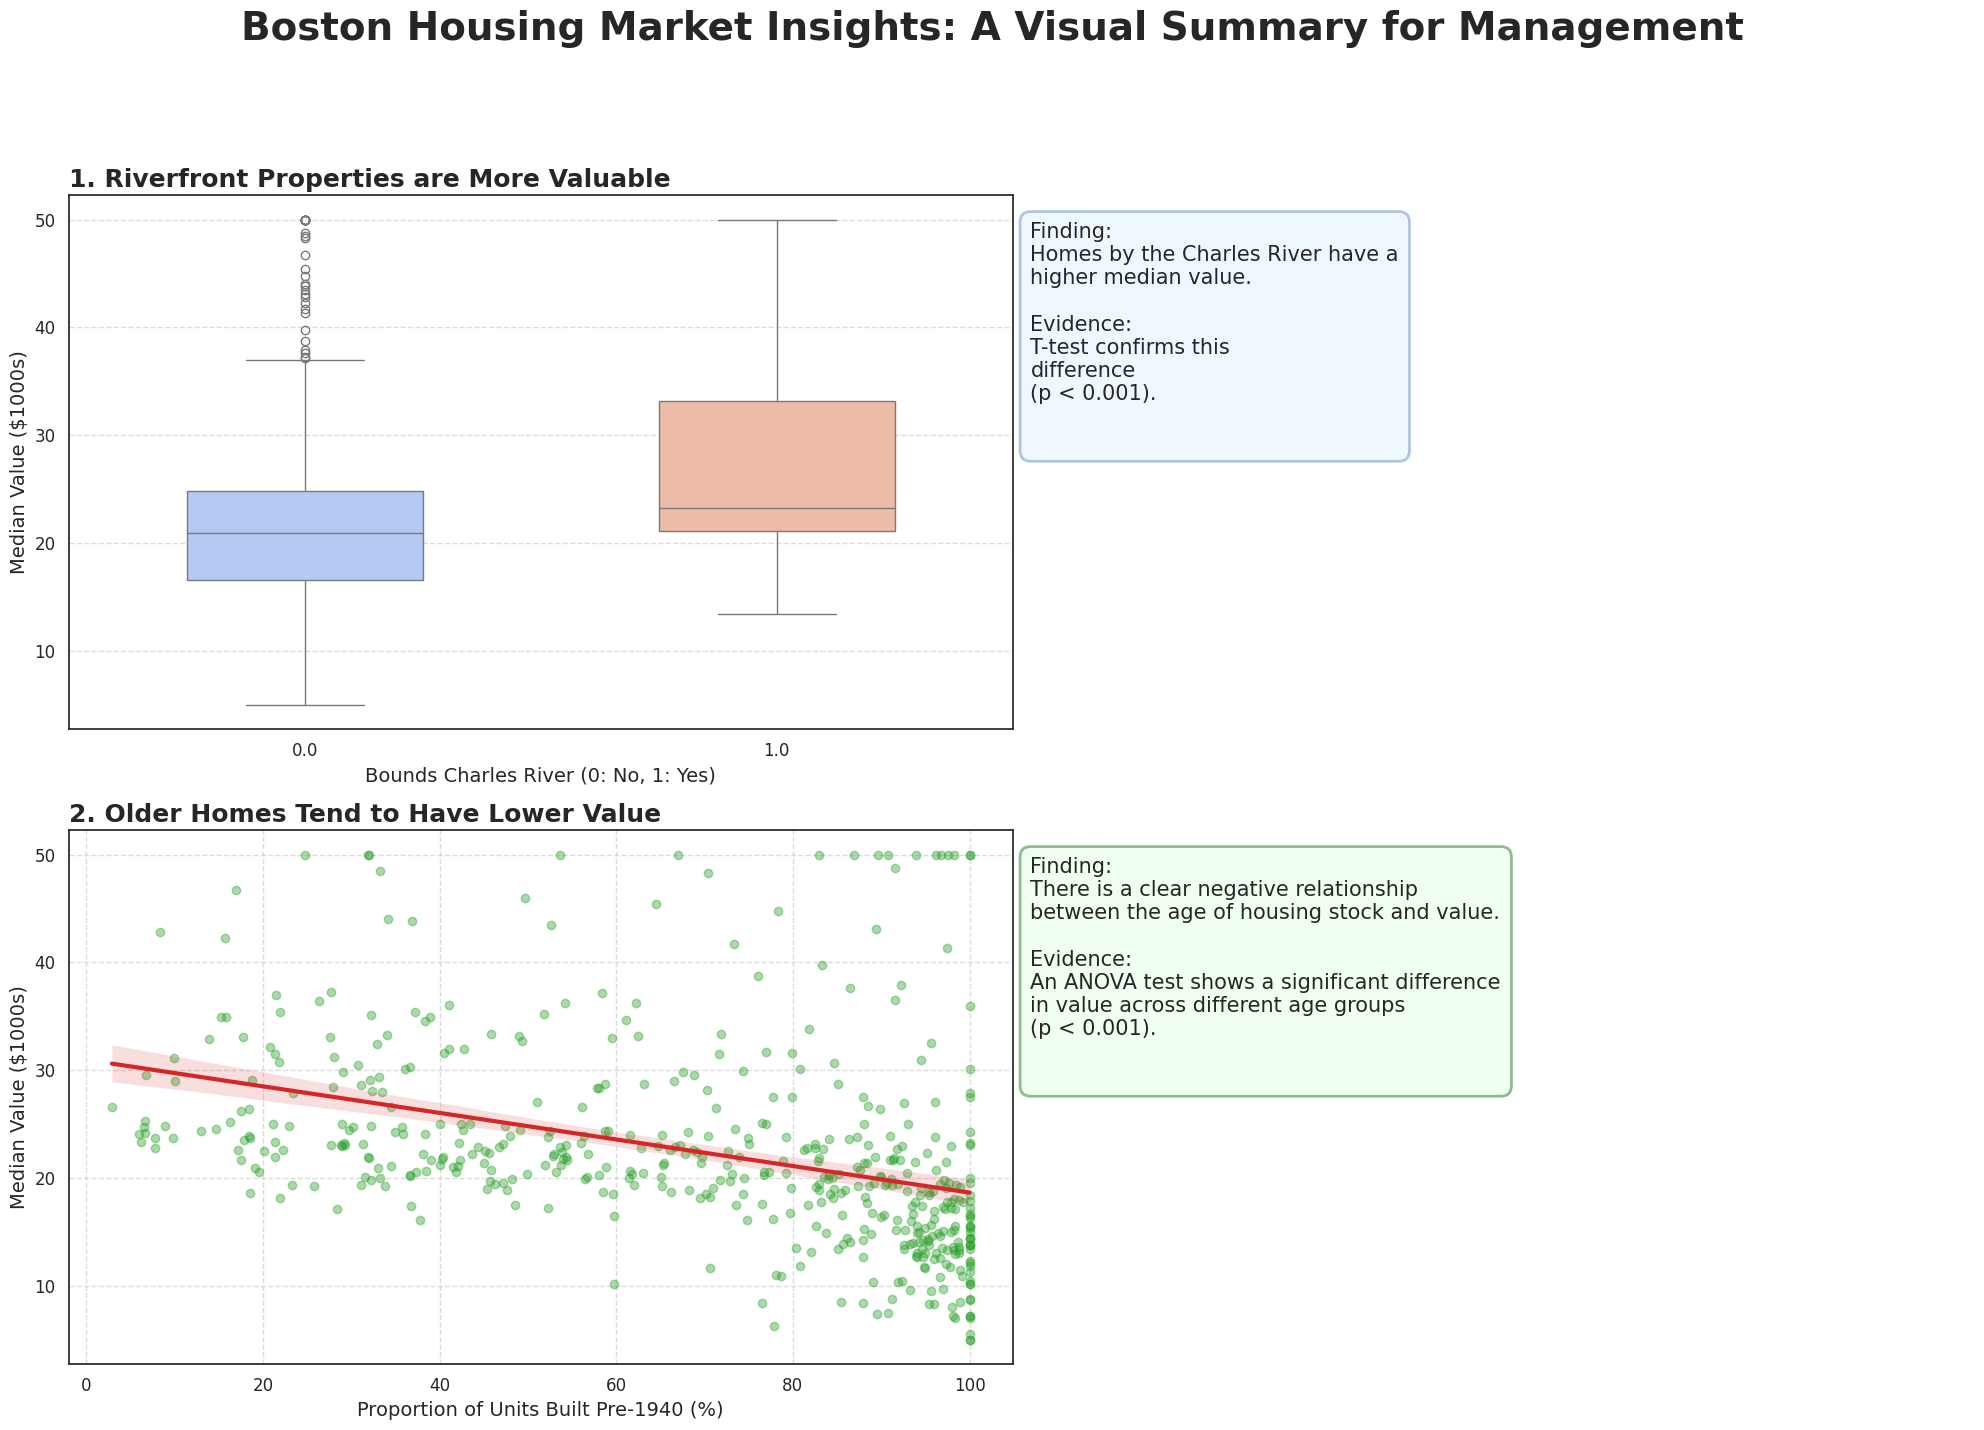

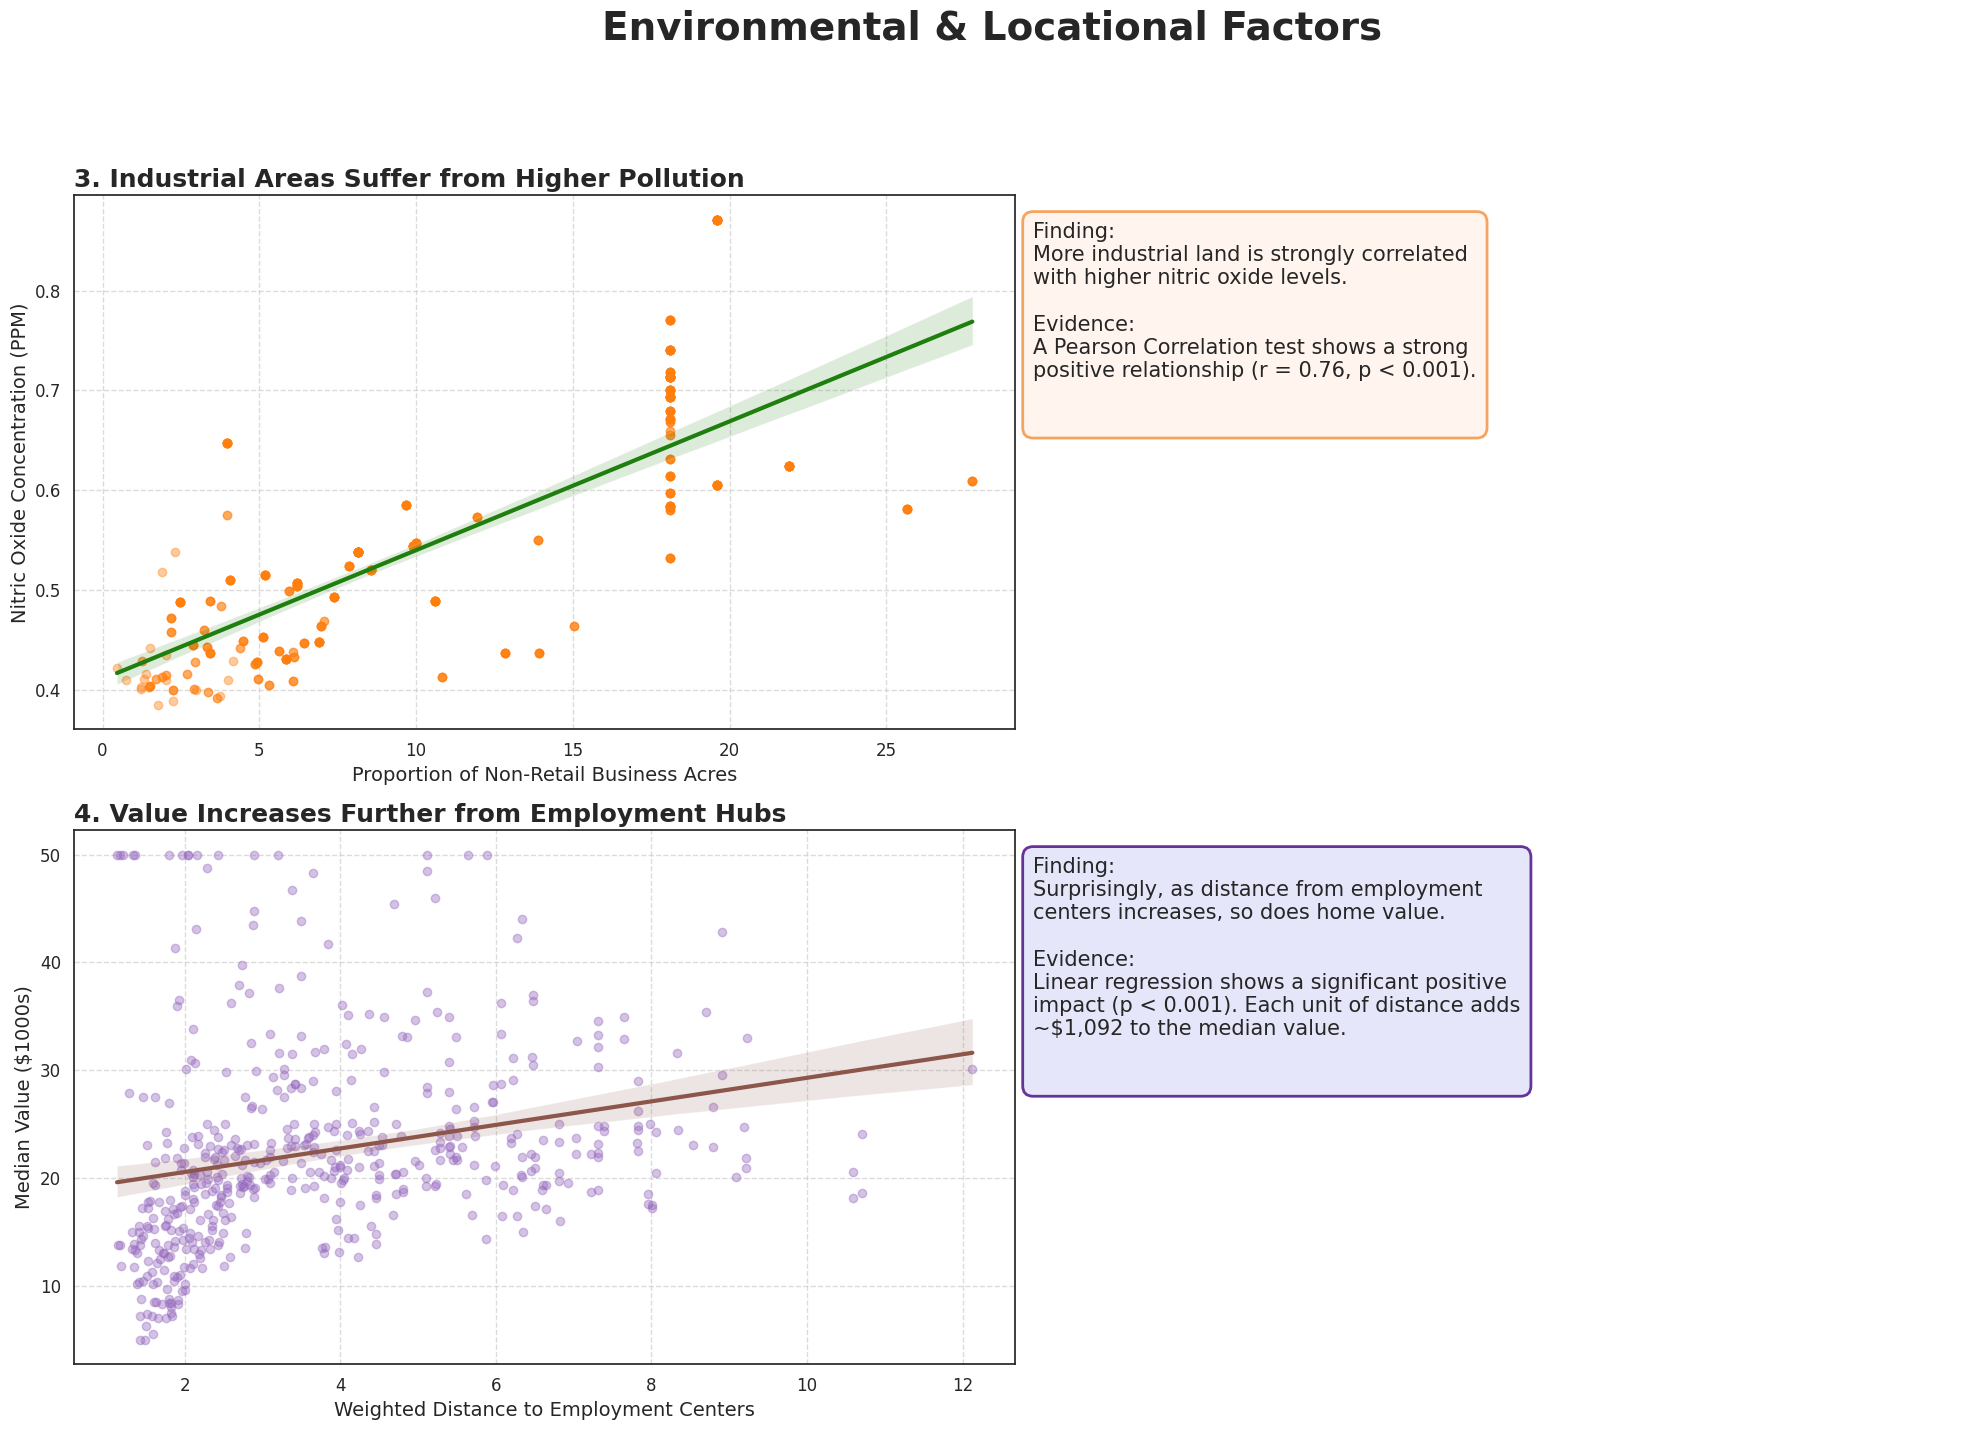

In [24]:
# Set a modern plot style
sns.set_style("white")

# --- Create the main figure for the report ---
fig, axes = pyplot.subplots(2, 2, figsize=(20, 14))
fig.suptitle('Boston Housing Market Insights: A Visual Summary for Management', fontsize=28, fontweight='bold', y=1.02)

# --- Plot 1: Charles River Proximity ---
ax1 = axes[0, 0]
sns.boxplot(x='CHAS', y='MEDV', data=boston_df, ax=ax1, palette='coolwarm', width=0.5)
ax1.set_title('1. Riverfront Properties are More Valuable', fontsize=18, fontweight='bold', loc='left')
ax1.set_xlabel('Bounds Charles River (0: No, 1: Yes)', fontsize=14)
ax1.set_ylabel('Median Value ($1000s)', fontsize=14)
ax1.tick_params(axis='both', which='major', labelsize=12)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# --- Text Summary for Plot 1 ---
ax2 = axes[0, 1]
ax2.axis('off')
summary_text1 = (
    "Finding:\n"
    "Homes by the Charles River have a\n"
    "higher median value.\n\n"
    "Evidence:\n"
    "T-test confirms this\n"
    "difference\n"
    "(p < 0.001).\n\n"
)
ax2.text(0.0, 0.95, summary_text1, transform=ax2.transAxes, ha='left', va='top', fontsize=15, family='sans-serif', bbox=dict(boxstyle='round,pad=0.5', fc='aliceblue', ec='lightsteelblue', lw=2))


# --- Plot 2: Age of Housing Stock ---
ax3 = axes[1, 0]
sns.regplot(x='AGE', y='MEDV', data=boston_df, ax=ax3, scatter_kws={'alpha':0.4, 'color':'#2ca02c'}, line_kws={'color':'#d62728', 'linewidth':3})
ax3.set_title('2. Older Homes Tend to Have Lower Value', fontsize=18, fontweight='bold', loc='left')
ax3.set_xlabel('Proportion of Units Built Pre-1940 (%)', fontsize=14)
ax3.set_ylabel('Median Value ($1000s)', fontsize=14)
ax3.tick_params(axis='both', which='major', labelsize=12)
ax3.grid(True, linestyle='--', alpha=0.7)

# --- Text Summary for Plot 2 ---
ax4 = axes[1, 1]
ax4.axis('off')
summary_text2 = (
    "Finding:\n"
    "There is a clear negative relationship\n"
    "between the age of housing stock and value.\n\n"
    "Evidence:\n"
    "An ANOVA test shows a significant difference\n"
    "in value across different age groups\n"
    "(p < 0.001).\n\n"
)
ax4.text(0.0, 0.95, summary_text2, transform=ax4.transAxes, ha='left', va='top', fontsize=15, family='sans-serif', bbox=dict(boxstyle='round,pad=0.5', fc='honeydew', ec='darkseagreen', lw=2))

# Adjust layout and display the plot
pyplot.tight_layout(rect=[0, 0, 1, 0.96])
pyplot.show()



# --- Create a second figure for the remaining plots ---
fig2, axes2 = pyplot.subplots(2, 2, figsize=(20, 14))
fig2.suptitle('Environmental & Locational Factors', fontsize=28, fontweight='bold', y=1.02)

# --- Plot 3: Industrial Activity vs. Air Pollution ---
ax5 = axes2[0, 0]
sns.regplot(x='INDUS', y='NOX', data=boston_df, ax=ax5, scatter_kws={'alpha':0.4, 'color':'#ff7f0e'}, line_kws={'color':'#1f7f0e', 'linewidth':3})
ax5.set_title('3. Industrial Areas Suffer from Higher Pollution', fontsize=18, fontweight='bold', loc='left')
ax5.set_xlabel('Proportion of Non-Retail Business Acres', fontsize=14)
ax5.set_ylabel('Nitric Oxide Concentration (PPM)', fontsize=14)
ax5.tick_params(axis='both', which='major', labelsize=12)
ax5.grid(True, linestyle='--', alpha=0.7)

# --- Text Summary for Plot 3 ---
ax6 = axes2[0, 1]
ax6.axis('off')
summary_text3 = (
    "Finding:\n"
    "More industrial land is strongly correlated\n"
    "with higher nitric oxide levels.\n\n"
    "Evidence:\n"
    "A Pearson Correlation test shows a strong\n"
    "positive relationship (r = 0.76, p < 0.001).\n\n"
)
ax6.text(0.0, 0.95, summary_text3, transform=ax6.transAxes, ha='left', va='top', fontsize=15, family='sans-serif', bbox=dict(boxstyle='round,pad=0.5', fc='seashell', ec='sandybrown', lw=2))


# --- Plot 4: Distance to Employment Centers ---
ax7 = axes2[1, 0]
sns.regplot(x='DIS', y='MEDV', data=boston_df, ax=ax7, scatter_kws={'alpha':0.4, 'color':'#9467bd'}, line_kws={'color':'#8c564b', 'linewidth':3})
ax7.set_title('4. Value Increases Further from Employment Hubs', fontsize=18, fontweight='bold', loc='left')
ax7.set_xlabel('Weighted Distance to Employment Centers', fontsize=14)
ax7.set_ylabel('Median Value ($1000s)', fontsize=14)
ax7.tick_params(axis='both', which='major', labelsize=12)
ax7.grid(True, linestyle='--', alpha=0.7)

# --- Text Summary for Plot 4 ---
ax8 = axes2[1, 1]
ax8.axis('off')
summary_text4 = (
    "Finding:\n"
    "Surprisingly, as distance from employment\n"
    "centers increases, so does home value.\n\n"
    "Evidence:\n"
    "Linear regression shows a significant positive\n"
    "impact (p < 0.001). Each unit of distance adds\n"
    "~$1,092 to the median value.\n\n"
)
ax8.text(0.0, 0.95, summary_text4, transform=ax8.transAxes, ha='left', va='top', fontsize=15, family='sans-serif', bbox=dict(boxstyle='round,pad=0.5', fc='lavender', ec='rebeccapurple', lw=2))


# Adjust layout and display the plot
pyplot.tight_layout(rect=[0, 0, 1, 0.96])
pyplot.show()

